In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is dep

In [12]:
data_folder = f'../data'
dlpfc_folder = f'{data_folder}/DLPFC'
brca1_folder = f'{data_folder}/BRCA1'
dlpfc_files = glob.glob(f'{dlpfc_folder}/*')
brca1_files = glob.glob(f'{brca1_folder}/*')

out_folder = f'../Results/figures/GroundTruth'
os.makedirs(out_folder, exist_ok=True)

In [41]:
def plot_gt(adata, out_path, section_id=None):
    if section_id is not None:
        fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    else:
        fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    sc.pl.spatial(adata, color='gt', ax=axes, show=False)
    if section_id is not None:
        axes.set_title(f'Ground Truth ({section_id})', fontsize=12, fontweight='bold')
        axes.set_aspect('equal', adjustable='datalim')
    else:
        axes.set_title(f'Ground Truth', fontsize=12, fontweight='bold')
        axes.set_aspect('auto', adjustable='datalim')
        # Make legend on 1 vertical line 
        handles, labels = axes.get_legend_handles_labels()
        axes.legend(handles=handles, 
                    labels=labels, 
                    loc='center left',
                    bbox_to_anchor=(1, 0.5), 
                    # fontsize=8, 
                    frameon=False, ncol=1)
        
    axes.axis('off')
    plt.tight_layout()

    plt.savefig(os.path.join(out_path, 'gt.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(out_path, 'gt.pdf'), format='pdf', bbox_inches='tight')

In [ ]:
for i, file in enumerate(dlpfc_files):
    section_id = file.split('/')[-1]
    out_path = os.path.join(out_folder, 'DLPFC', section_id)
    os.makedirs(out_path, exist_ok=True)
    
    file_path = os.path.join(dlpfc_folder, section_id)
    adata = sc.read_visium(file_path, count_file='filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique()
    metadata = pd.read_csv(os.path.join(file_path, 'metadata.tsv'), sep='\t')
    adata.obs['gt'] = metadata['layer_guess'].values
    adata = adata[~pd.isnull(adata.obs['gt'])]
    adata.obs['gt'] = adata.obs['gt'].astype(str)
    
    plot_gt(adata, out_path, section_id)

/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/lytq/.conda/envs/SEDR/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_890313/88836248.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['gt'] = adata.obs['gt'].astype(str)


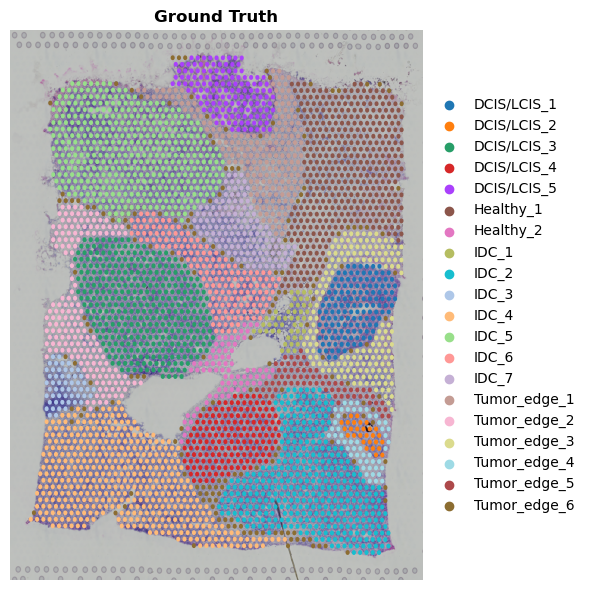

In [42]:
out_path = os.path.join(out_folder, 'BRCA1')
os.makedirs(out_path, exist_ok=True)

for file in brca1_files:
    adata = sc.read_visium(file, count_file='filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique()
    metadata = pd.read_csv(os.path.join(file, 'metadata.tsv'), sep='\t')
    adata.obs['gt'] = metadata['fine_annot_type'].values
    adata = adata[~pd.isnull(adata.obs['gt'])]
    adata.obs['gt'] = adata.obs['gt'].astype(str)
    plot_gt(adata, out_path)